<a href="https://colab.research.google.com/github/olupy/ml-models/blob/main/Majidun_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Majidun_merged.xlsx to Majidun_merged (1).xlsx
Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 9107.4678 - val_loss: 9901.4473
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 7985.8047 - val_loss: 7729.3677
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 5087.4238 - val_loss: 3957.0203
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 2564.9539 - val_loss: 2493.1260
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 2096.2114 - val_loss: 2269.0120
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 1909.6140 - val_loss: 2062.3877
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 1693.3433 - val_loss: 1778.8735
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 1454.0791 - val_loss: 1499.4492
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 1196.2314 - val_loss: 1190.0627
E

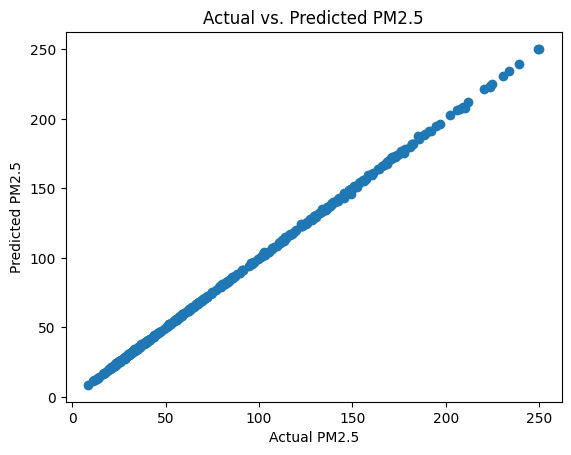

14/14 [==============================] - 0s 1ms/step
MSE (PM10): 156905.20299486857
MAE (PM10): 276.85715408568217


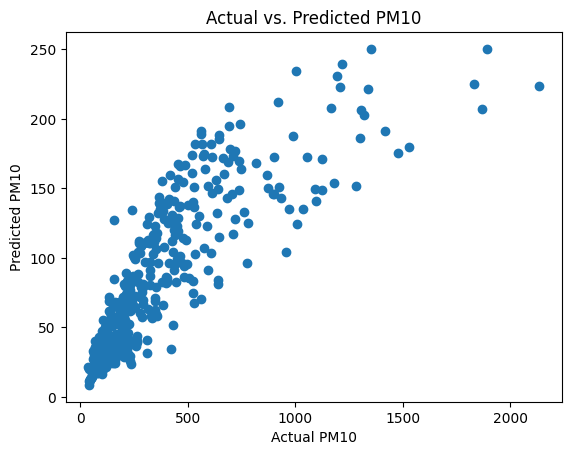

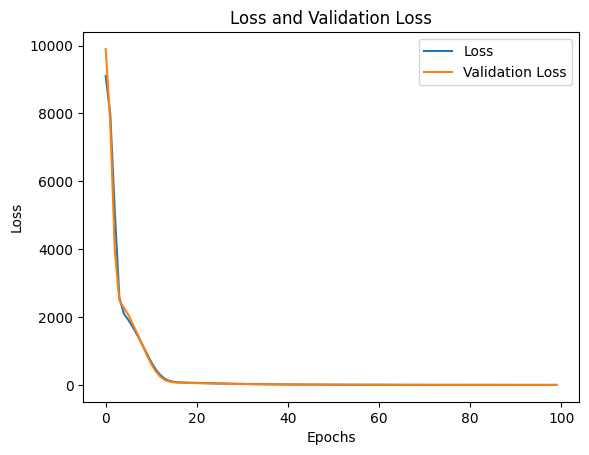

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import time
uploaded = files.upload()
# Load the Excel file
df = pd.read_excel('Majidun_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)
# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
start_time = time.time()
# Train the model
history = model.fit(X_train_scaled, y_train_pm25, validation_split=0.2, epochs=100, callbacks=[early_stopping])
end_time = time.time()
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

procesing_time = end_time - start_time
print("processing time for Majidun-ANN:", procesing_time)
# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
# Scatter plot for PM2.5
plt.scatter(y_test_pm25, y_pred_pm25)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_scaled)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)
# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()
# Plot loss and validation loss over epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()
plt.show()





Saving Majidun_merged.xlsx to Majidun_merged (2).xlsx
Epoch 1/100
43/43 [==============================] - 1s 8ms/step - loss: 8662.6816 - val_loss: 6080.4478
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 3078.1011 - val_loss: 3006.5396
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 2615.4141 - val_loss: 2895.4502
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 2544.3840 - val_loss: 2803.9553
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 2503.3142 - val_loss: 2830.4016
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 2431.4636 - val_loss: 2697.1462
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 2362.1580 - val_loss: 2551.1892
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 2205.9832 - val_loss: 2430.3577
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 1856.2167 - val_loss: 1752.1774
E

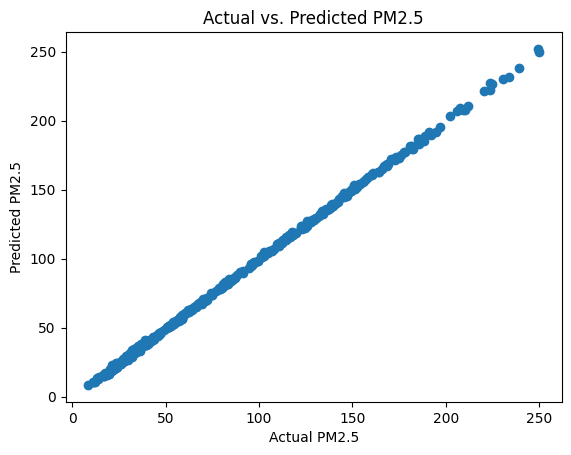

14/14 [==============================] - 0s 2ms/step
MSE (PM10): 157130.69041910584
MAE (PM10): 277.6004402588856


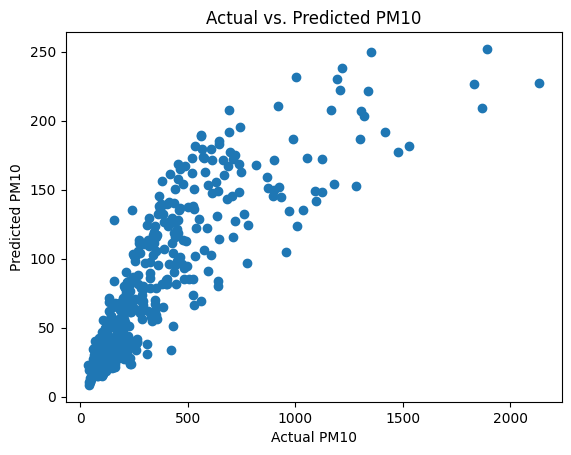

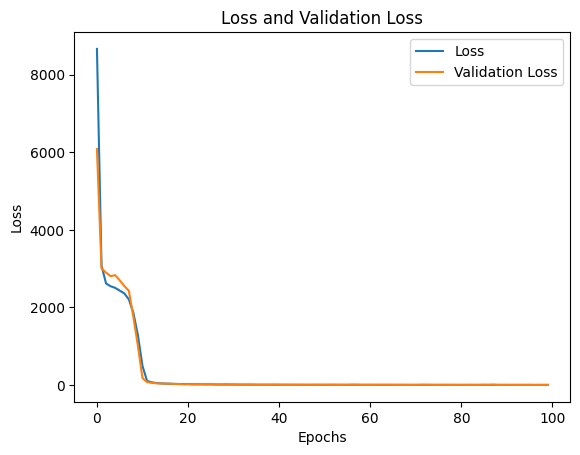

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import time

uploaded = files.upload()
# Load the Excel file
df = pd.read_excel('Majidun_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)
# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for RNN
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

start_time = time.time()
# Train the model
history = model.fit(X_train_rnn, y_train_pm25, validation_split=0.2, epochs=100, callbacks=[early_stopping])
end_time = time.time()
processing_time = end_time - start_time
print("processing time for Majidun RNN: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_rnn)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)

# Scatter plot for PM2.5
plt.scatter(y_test_pm25, y_pred_pm25)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_rnn)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)

# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()

# Plot loss and validation loss over epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()
plt.show()


Saving Majidun_merged.xlsx to Majidun_merged (3).xlsx
Processing time for Random Forest Regression:  0.6419582366943359
MSE (PM2.5): 0.0302304826647296
MAE (PM2.5): 0.09675357311458735


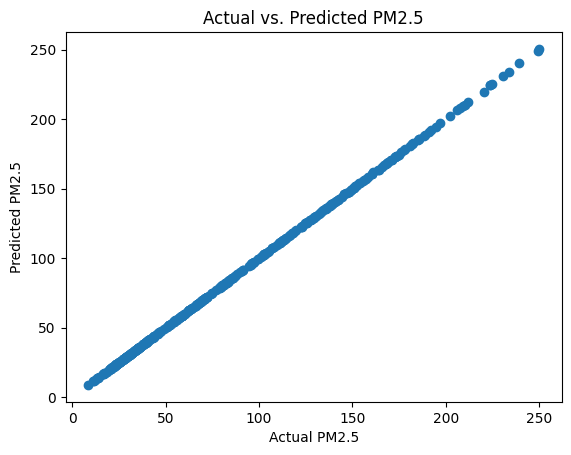

MSE (PM10): 156931.87799267235
MAE (PM10): 276.9031820155052


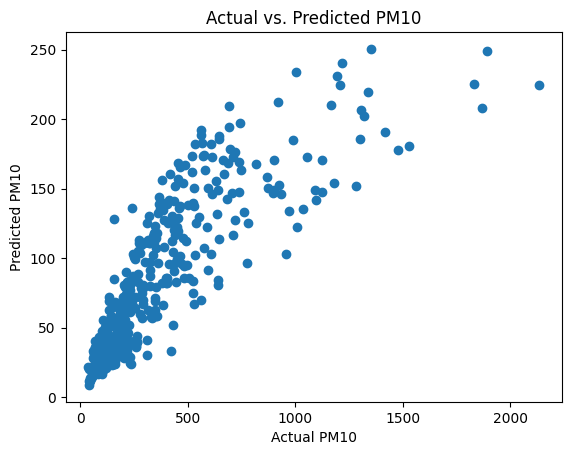

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Majidun_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
time_taken = end_time - start_time
print("Processing time for Random Forest Regression: ", time_taken)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)

# Scatter plot for PM2.5
plt.scatter(y_test_pm25, y_pred_pm25)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_scaled)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)

# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()


Saving Majidun_merged.xlsx to Majidun_merged (4).xlsx
Processing time for Gradient Boosting:  0.31650781631469727
MSE (PM2.5): 0.22515097397382997
MAE (PM2.5): 0.34274794667264114


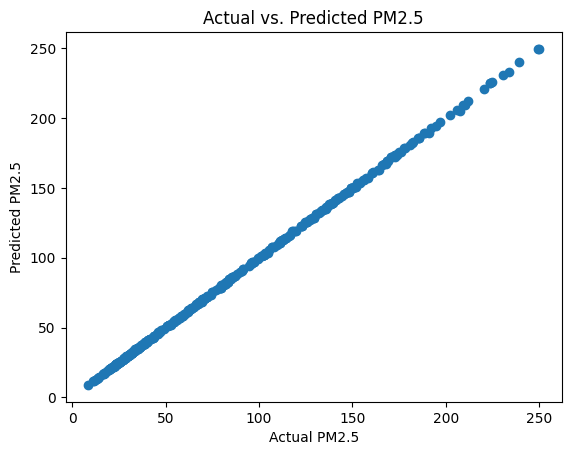

MSE (PM10): 156940.9492668838
MAE (PM10): 276.914500323405


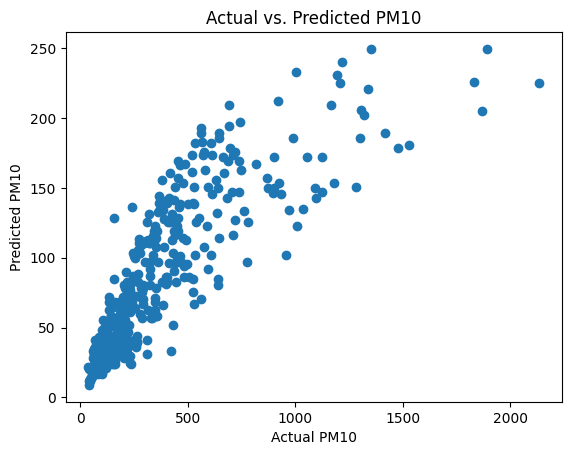

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Majidun_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
processing_time = end_time - start_time
print("Processing time for Gradient Boosting: ", processing_time)

# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)

# Scatter plot for PM2.5
plt.scatter(y_test_pm25, y_pred_pm25)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_scaled)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)

# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()


Saving Majidun_merged.xlsx to Majidun_merged (6).xlsx
Processing Time for Decision Tree is:  0.008307933807373047
MSE (PM2.5): 0.09482048346143947
MAE (PM2.5): 0.14891101229647036


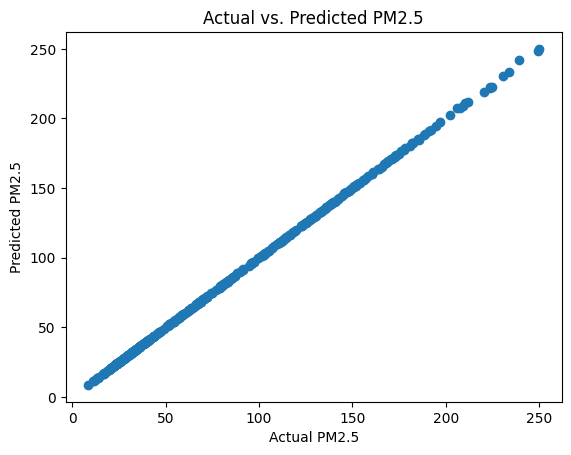

MSE (PM10): 156986.62474774427
MAE (PM10): 276.91832806171055


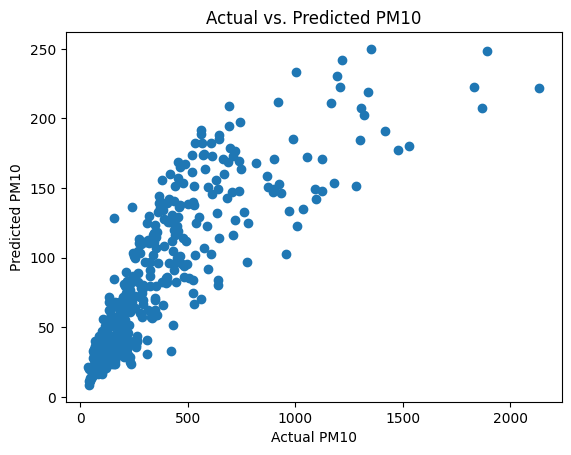

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Majidun_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
processing_time = end_time - start_time
print("Processing Time for Decision Tree is: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)

# Scatter plot for PM2.5
plt.scatter(y_test_pm25, y_pred_pm25)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_scaled)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)

# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()
